In [117]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from warnings import filterwarnings
filterwarnings(action='ignore')

In [118]:
loan=pd.read_csv('loan_prediction.csv')

In [119]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [120]:
loan.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


# Explanatory Data Analysis

In [121]:
#finding the null values
loan.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [122]:
#filling the null values
loan['Gender'].fillna(loan['Gender'].mode()[0],inplace=True)
loan['Married'].fillna(loan['Married'].mode()[0],inplace=True)
loan['Education'].fillna(loan['Education'].mode()[0],inplace=True)
loan['Dependents'].fillna(loan['Dependents'].mode()[0],inplace=True)
loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0],inplace=True)
loan['LoanAmount'].fillna(loan['LoanAmount'].median(),inplace=True)
loan['Credit_History'].fillna(loan['Credit_History'].median(),inplace=True)





In [123]:
#replacing all string data into int form of data
from sklearn import preprocessing
a=preprocessing.LabelEncoder()
loan['Gender']=a.fit_transform(loan['Gender'])
loan['Married']=a.fit_transform(loan['Married'])
loan['Education']=a.fit_transform(loan['Education'])
loan['Self_Employed']=a.fit_transform(loan['Self_Employed'])
loan['Property_Area']=a.fit_transform(loan['Property_Area'])
loan['Loan_Status']=a.fit_transform(loan['Loan_Status'])
loan['Dependents']=a.fit_transform(loan['Dependents'])

In [124]:
#dropping unnecessary columns
loan=loan.drop(columns='Loan_ID',axis=1)

In [125]:
loan=loan.drop(columns='Loan_Amount_Term',axis=1)

In [126]:
loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,1.0,2,1


In [127]:
loan['Dependents']=loan['Dependents'].replace('3+','3')

In [128]:
loan['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [129]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int32  
 10  Loan_Status        614 non-null    int32  
dtypes: float64(3), int32(7), int64(1)
memory usage: 36.1 KB


In [73]:
loan.keys()

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [74]:
loan.dtypes

Gender                 int32
Married                int32
Dependents            object
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

# Statistical Summary

In [76]:
#correlation
loan.corr()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.045364,-0.000525,0.058809,0.082912,0.106904,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.012304,0.004489,0.051708,0.075948,0.146546,0.010938,0.004257,0.091478
Education,0.045364,0.012304,1.000000,-0.010383,-0.140760,-0.062290,-0.168759,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,-0.010383,1.000000,0.127180,-0.016100,0.115100,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,-0.140760,0.127180,1.000000,-0.116605,0.565181,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,-0.062290,-0.016100,-0.116605,1.000000,0.189218,0.011134,0.010522,-0.059187
LoanAmount,0.106904,0.146546,-0.168759,0.115100,0.565181,0.189218,1.000000,-0.000607,-0.046632,-0.033214
Credit_History,0.009170,0.010938,-0.073658,-0.001550,-0.018615,0.011134,-0.000607,1.000000,0.001963,0.540556
Property_Area,-0.025752,0.004257,-0.065243,-0.030860,-0.009500,0.010522,-0.046632,0.001963,1.000000,0.032112
Loan_Status,0.017987,0.091478,-0.085884,-0.003700,-0.004710,-0.059187,-0.033214,0.540556,0.032112,1.000000


In [77]:
loan.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.218241,0.133550,5403.459283,1621.245798,145.752443,0.855049,1.037459,0.687296
std,0.386497,0.476373,0.413389,0.340446,6109.041673,2926.248369,84.107233,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,1.000000,2.000000,1.000000


# Feature Engineering

In [78]:
x=loan.drop(columns=['Loan_Status'],axis=1)
print(x)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0          0          0              0             5849   
1         1        1          1          0              0             4583   
2         1        1          0          0              1             3000   
3         1        1          0          1              0             2583   
4         1        0          0          0              0             6000   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          0              0             2900   
610       1        1          3          0              0             4106   
611       1        1          1          0              0             8072   
612       1        1          2          0              0             7583   
613       0        0          0          0              1             4583   

     CoapplicantIncome  LoanAmount  Credit_History  Property_Ar

In [79]:
y=loan['Loan_Status']
print(y)

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32


# Data Visulaization

<Figure size 2000x600 with 0 Axes>

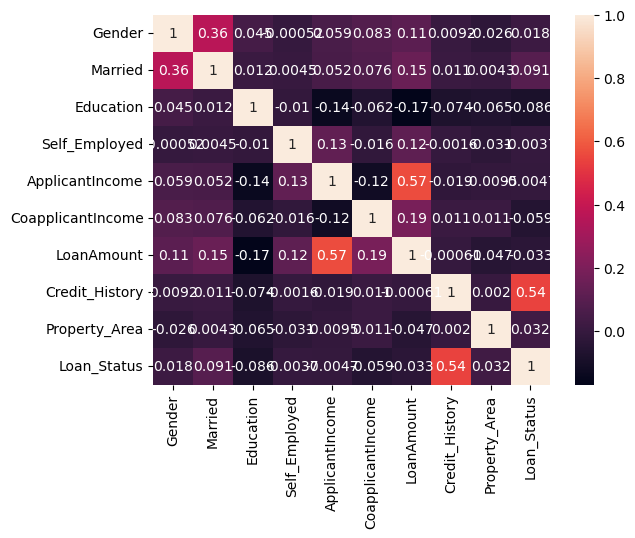

<Figure size 2000x600 with 0 Axes>

In [81]:
corr_hmap = loan.corr()
heatmap = sns.heatmap(loan.corr(), annot=True)
plt.figure(figsize=(20, 6))

# Univariate Analysis

# Count Plot

<function matplotlib.pyplot.show(close=None, block=None)>

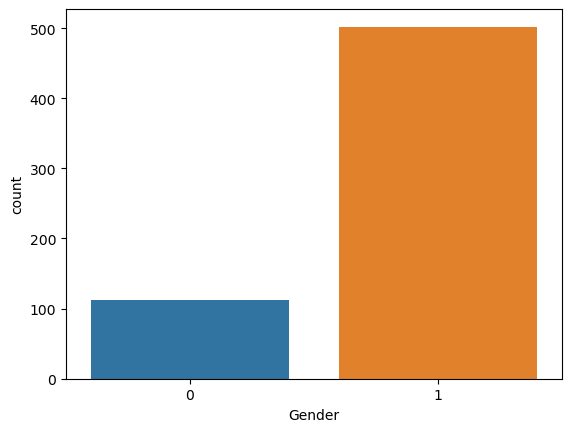

In [83]:
sns.countplot(x ='Gender', data = loan)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

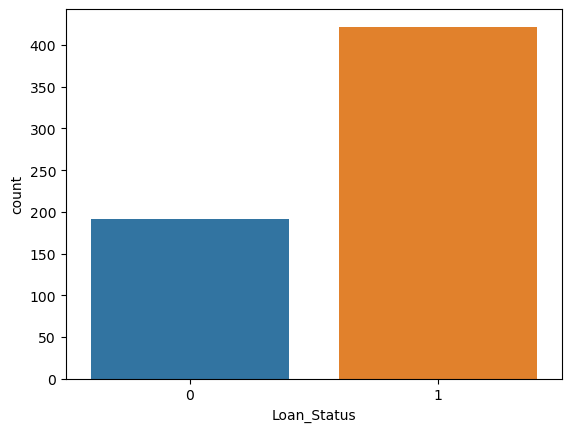

In [84]:
sns.countplot(x ='Loan_Status', data = loan)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

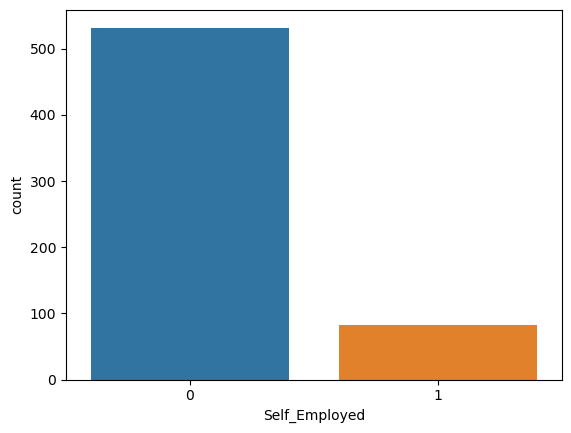

In [85]:
sns.countplot(x ='Self_Employed', data = loan)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

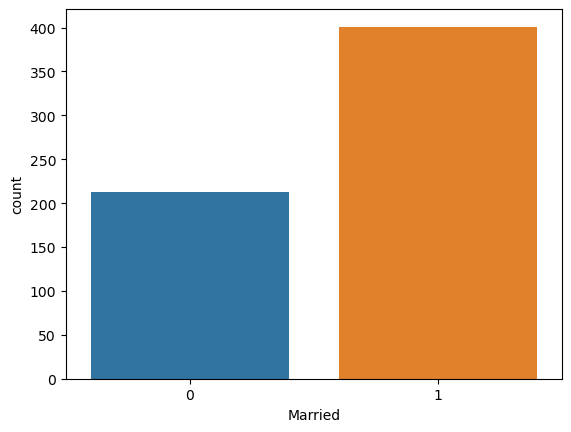

In [86]:
sns.countplot(x ='Married', data = loan)
plt.show

# Distplot

<function matplotlib.pyplot.show(close=None, block=None)>

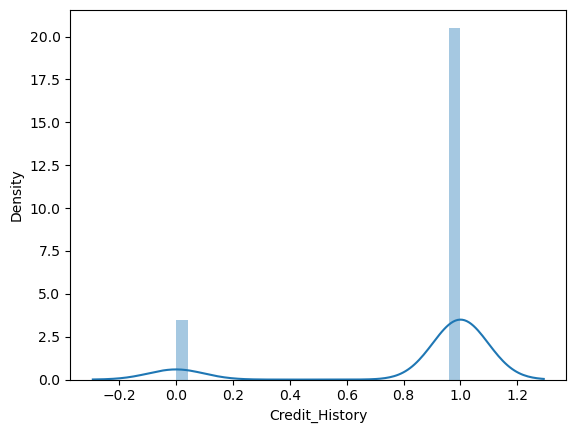

In [87]:
sns.distplot(loan['Credit_History'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

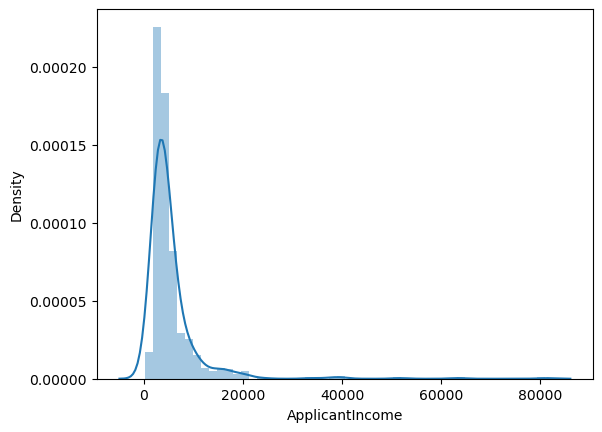

In [88]:
sns.distplot(loan['ApplicantIncome'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

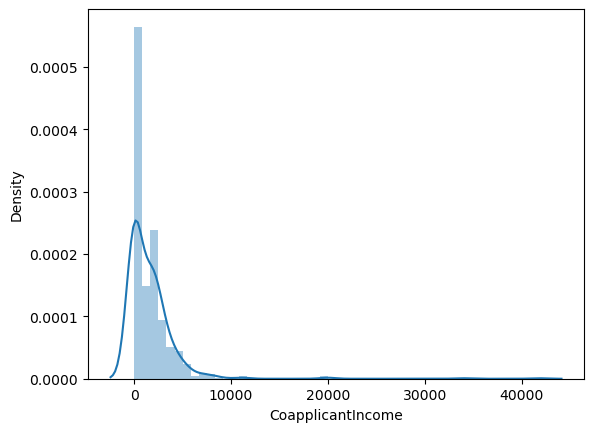

In [89]:
sns.distplot(loan['CoapplicantIncome'])
plt.show

# Bivariate Analysis

# Bar Plot

<Axes: xlabel='Gender', ylabel='ApplicantIncome'>

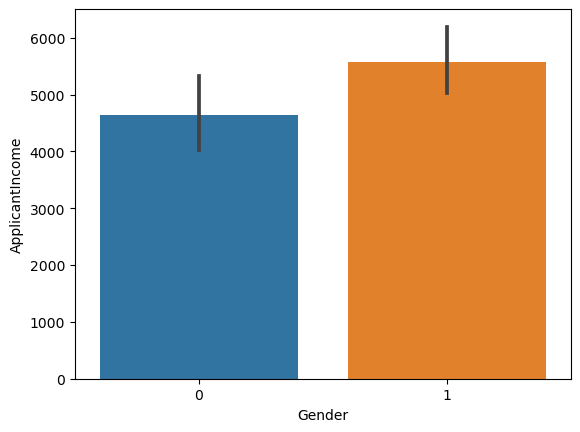

In [90]:

sns.barplot(x='Gender',y='ApplicantIncome',data=loan)

<Axes: xlabel='Gender', ylabel='Loan_Status'>

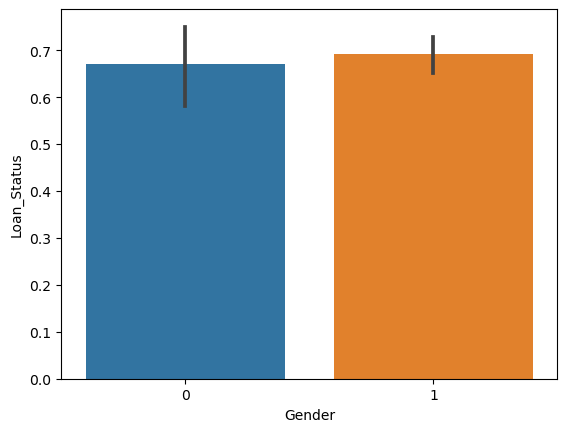

In [91]:

sns.barplot(x='Gender',y='Loan_Status',data=loan)

<Axes: xlabel='Education', ylabel='Loan_Status'>

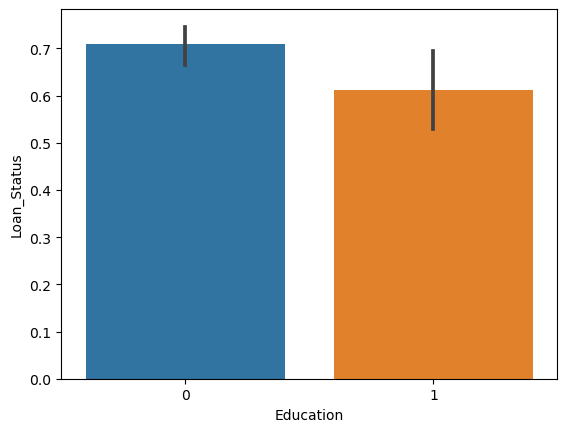

In [92]:

sns.barplot(x='Education',y='Loan_Status',data=loan)

# Violin Plot

<Axes: xlabel='Credit_History', ylabel='Loan_Status'>

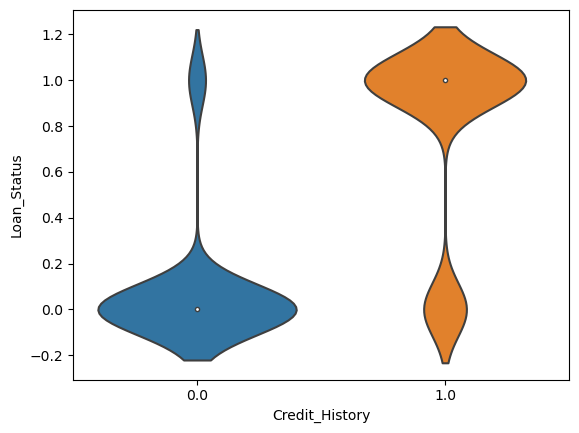

In [93]:
sns.violinplot(x='Credit_History',y='Loan_Status',data=loan)

<Axes: xlabel='Education', ylabel='Credit_History'>

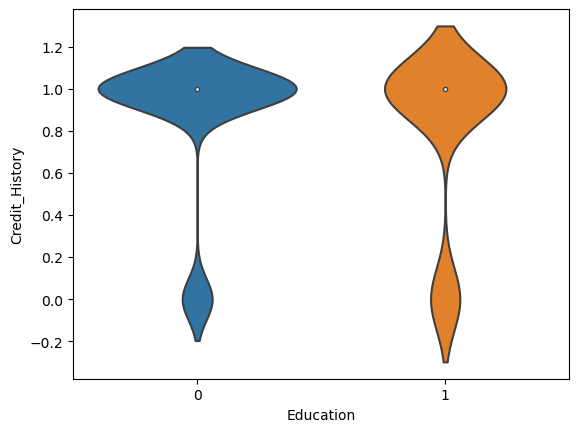

In [94]:
sns.violinplot(x='Education',y='Credit_History',data=loan)

<Axes: xlabel='Education', ylabel='LoanAmount'>

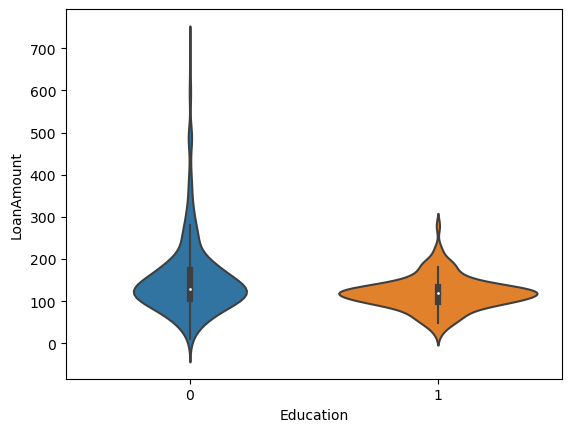

In [96]:
sns.violinplot(x='Education',y='LoanAmount',data=loan)

# Box plot

Gender                  Axes(0.125,0.747241;0.133621x0.132759)
Married              Axes(0.285345,0.747241;0.133621x0.132759)
Education             Axes(0.44569,0.747241;0.133621x0.132759)
Self_Employed        Axes(0.606034,0.747241;0.133621x0.132759)
ApplicantIncome      Axes(0.766379,0.747241;0.133621x0.132759)
CoapplicantIncome       Axes(0.125,0.587931;0.133621x0.132759)
LoanAmount           Axes(0.285345,0.587931;0.133621x0.132759)
Credit_History        Axes(0.44569,0.587931;0.133621x0.132759)
Property_Area        Axes(0.606034,0.587931;0.133621x0.132759)
Loan_Status          Axes(0.766379,0.587931;0.133621x0.132759)
dtype: object

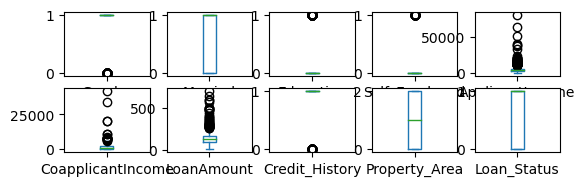

In [97]:
loan.plot(kind='box',subplots=True,layout=(5,5))

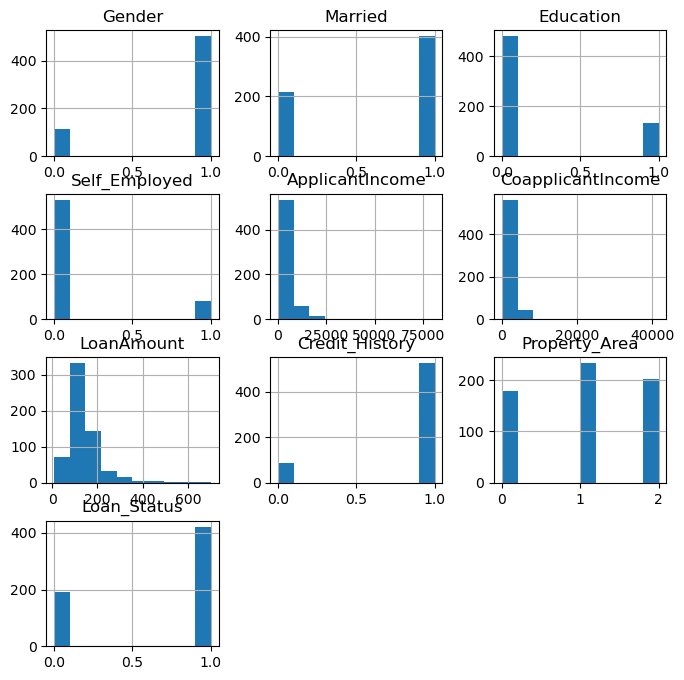

In [98]:
loan.hist(figsize=(8,8),bins=10)
plt.show()

# Scatter Plot

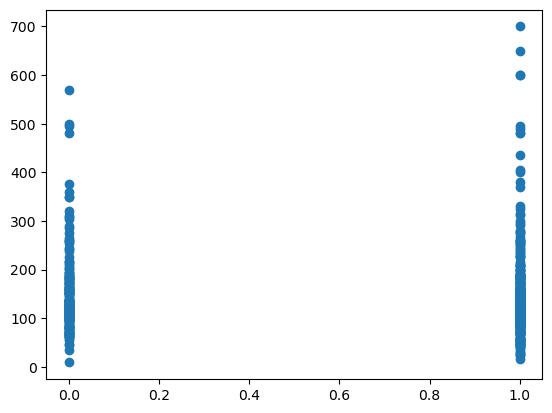

In [100]:
plt.scatter(loan['Loan_Status'],loan['LoanAmount'])
plt.show()

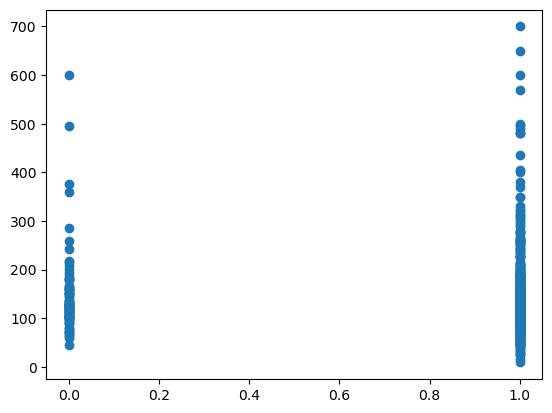

In [101]:
plt.scatter(loan['Credit_History'],loan['LoanAmount'])
plt.show()

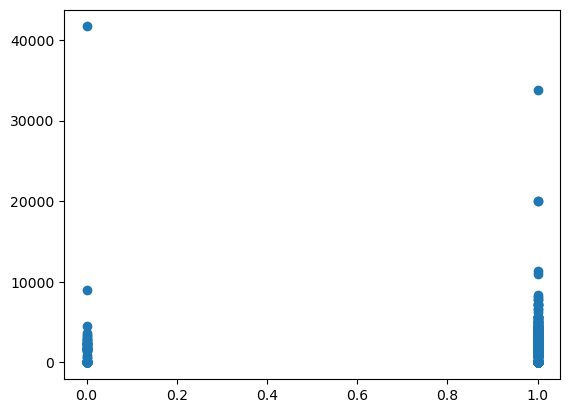

In [102]:
plt.scatter(loan['Gender'],loan['CoapplicantIncome'])
plt.show()

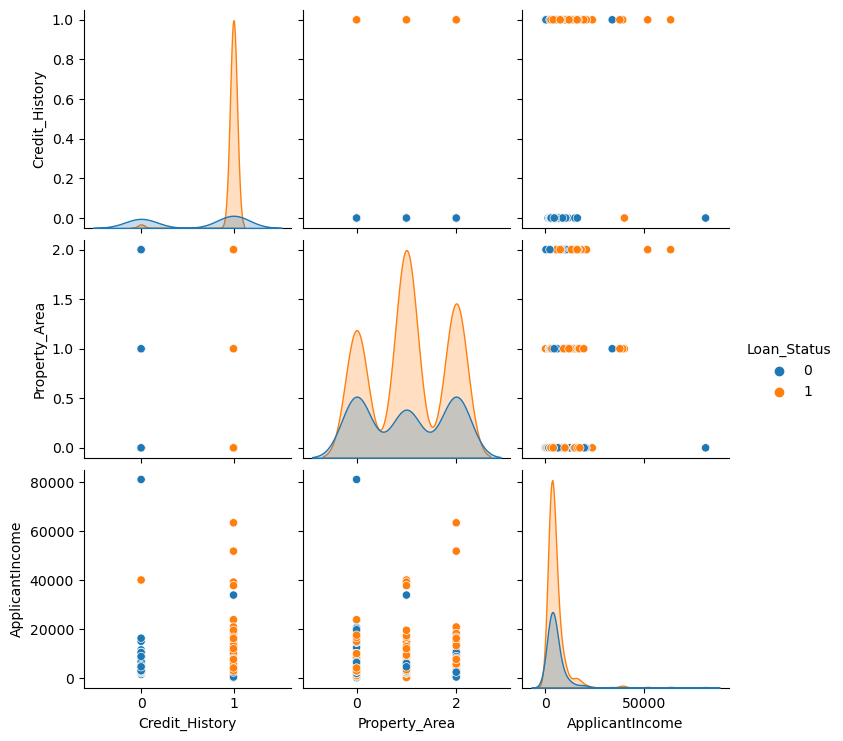

In [103]:
sns.pairplot(data=loan,hue='Loan_Status',vars=['Credit_History','Property_Area','ApplicantIncome'])

# Joint Plot

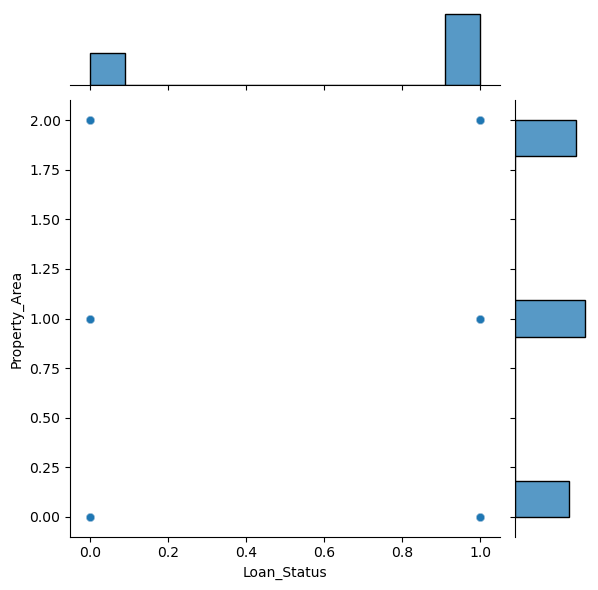

In [104]:
from scipy.stats import pearsonr
sns.jointplot(x='Loan_Status', y='Property_Area', data=loan, alpha=0.1)

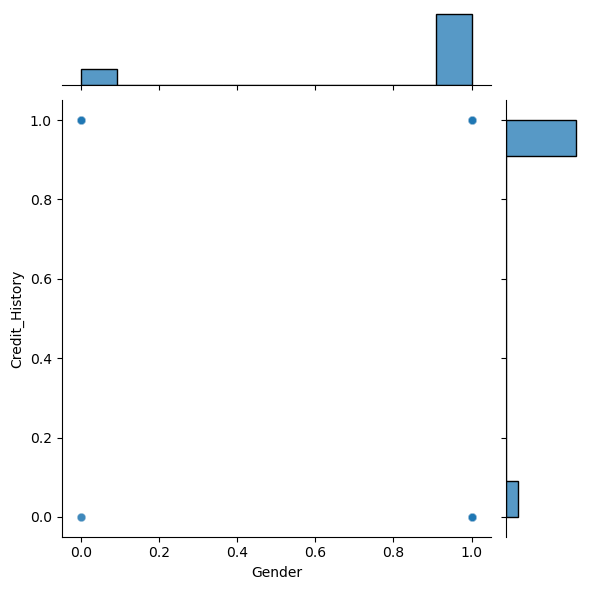

In [105]:
sns.jointplot(x='Gender', y='Credit_History', data=loan, alpha=0.1)

# Finding skewness

In [130]:
loan.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

# Removing Outliers/skewness

In [131]:
from scipy.stats import zscore
z=np.abs(zscore(loan))
z

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,0.472343,1.372089,0.737806,0.528362,0.392601,0.072991,0.554487,0.211241,0.411733,1.223298,0.674519
1,0.472343,0.728816,0.253470,0.528362,0.392601,0.134412,0.038732,0.211241,0.411733,1.318513,1.482537
2,0.472343,0.728816,0.737806,0.528362,2.547117,0.393747,0.554487,0.948996,0.411733,1.223298,0.674519
3,0.472343,0.728816,0.737806,1.892641,0.392601,0.462062,0.251980,0.306435,0.411733,1.223298,0.674519
4,0.472343,1.372089,0.737806,0.528362,0.392601,0.097728,0.554487,0.056551,0.411733,1.223298,0.674519
...,...,...,...,...,...,...,...,...,...,...,...
609,2.117107,1.372089,0.737806,0.528362,0.392601,0.410130,0.554487,0.889500,0.411733,1.318513,0.674519
610,0.472343,0.728816,2.236021,0.528362,0.392601,0.212557,0.554487,1.258378,0.411733,1.318513,0.674519
611,0.472343,0.728816,0.253470,0.528362,0.392601,0.437174,0.472404,1.276168,0.411733,1.223298,0.674519
612,0.472343,0.728816,1.244745,0.528362,0.392601,0.357064,0.554487,0.490816,0.411733,1.223298,0.674519


In [132]:
threshold=3
print(np.where(z>3))

(array([  9, 126, 130, 155, 155, 171, 171, 177, 177, 183, 185, 278, 308,
       333, 333, 369, 402, 409, 417, 432, 443, 487, 506, 523, 525, 561,
       581, 600, 604], dtype=int64), array([6, 5, 7, 5, 7, 5, 7, 6, 7, 5, 5, 7, 7, 5, 7, 7, 6, 5, 6, 7, 5, 7,
       7, 7, 7, 7, 6, 6, 7], dtype=int64))


In [133]:
loan_new=loan[(z<3).all(axis=1)]

In [134]:
loan=loan_new
loan.shape

(589, 11)

In [135]:
loan.skew()

Gender              -1.626104
Married             -0.631755
Dependents           1.038787
Education            1.303332
Self_Employed        2.218831
ApplicantIncome      2.164762
CoapplicantIncome    1.353191
LoanAmount           1.114173
Credit_History      -2.010069
Property_Area       -0.063183
Loan_Status         -0.828815
dtype: float64

# Training The Model

In [139]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=52)

In [140]:
x_train.shape

(429, 10)

In [141]:
x_test.shape

(185, 10)

In [142]:
y_train.shape

(429,)

In [143]:
y_test.shape

(185,)

# Fitting The Models

In [144]:
#logistic regression
lg=LogisticRegression()

In [145]:
#training the model
lg.fit(x_train,y_train)

LogisticRegression()

In [146]:
#testing the model
pred=lg.predict(x_test)

In [147]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [148]:
accuracy_score(y_test,pred)

0.827027027027027

In [149]:
print(confusion_matrix(y_test,pred))

[[ 25  27]
 [  5 128]]


<Axes: >

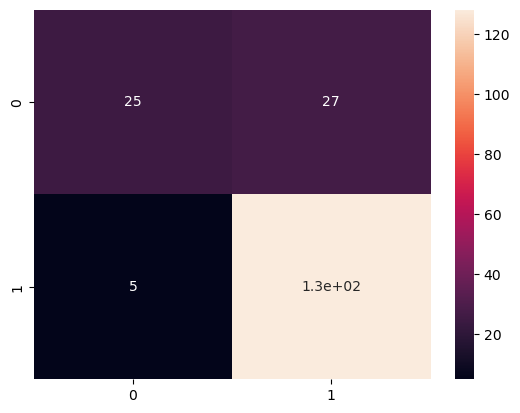

In [150]:
c=confusion_matrix(y_test,pred)
sns.heatmap(c,annot=True)

In [151]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.48      0.61        52
           1       0.83      0.96      0.89       133

    accuracy                           0.83       185
   macro avg       0.83      0.72      0.75       185
weighted avg       0.83      0.83      0.81       185



In [152]:
mnb=MultinomialNB()

In [153]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [154]:
predmnb=mnb.predict(x_test)

In [155]:
predmnb

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1])

In [156]:
accuracy_score(y_test,predmnb)

0.5027027027027027

<Axes: >

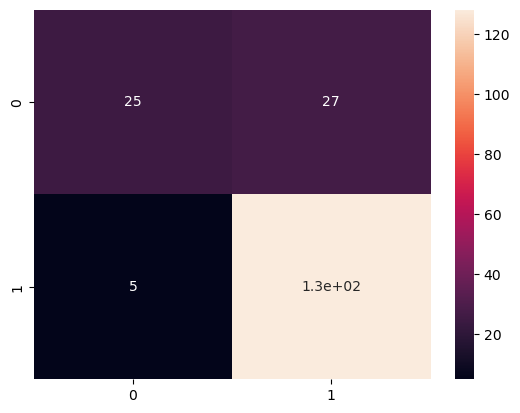

In [157]:
c=confusion_matrix(y_test,pred)
sns.heatmap(c,annot=True)

In [158]:
print(classification_report(y_test,predmnb))

              precision    recall  f1-score   support

           0       0.27      0.46      0.34        52
           1       0.71      0.52      0.60       133

    accuracy                           0.50       185
   macro avg       0.49      0.49      0.47       185
weighted avg       0.59      0.50      0.53       185



In [159]:
gb=GaussianNB()

In [160]:
gb.fit(x_train,y_train)

GaussianNB()

In [161]:
predgb=gb.predict(x_test)

In [162]:
accuracy_score(y_test,predgb)

0.8324324324324325

In [163]:
print(classification_report(y_test,predgb))

              precision    recall  f1-score   support

           0       0.84      0.50      0.63        52
           1       0.83      0.96      0.89       133

    accuracy                           0.83       185
   macro avg       0.83      0.73      0.76       185
weighted avg       0.83      0.83      0.82       185



In [164]:
knn=KNeighborsClassifier()

In [165]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [167]:
predknn=knn.predict(x_test)

In [168]:
accuracy_score(y_test,predknn)

0.6270270270270271

In [169]:
svc=SVC()

In [170]:
svc.fit(x_train,y_train)

SVC()

In [171]:
predsvc=svc.predict(x_test)

In [172]:
accuracy_score(y_test,predsvc)

0.7135135135135136

In [173]:
print(confusion_matrix(y_test,predsvc))

[[  0  52]
 [  1 132]]


In [174]:
dtc=DecisionTreeClassifier()

In [175]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [176]:
preddtc=dtc.predict(x_test)

In [177]:
accuracy_score(y_test,preddtc)

0.7081081081081081

In [178]:
print(confusion_matrix(y_test,preddtc))

[[ 31  21]
 [ 33 100]]


In [179]:
rfc=RandomForestClassifier()

In [180]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [181]:
predrfc=rfc.predict(x_test)

In [182]:
accuracy_score(y_test,predrfc)

0.7891891891891892

In [183]:
print(confusion_matrix(y_test,predrfc))

[[ 28  24]
 [ 15 118]]


In [184]:
print(classification_report(y_test,predrfc))

              precision    recall  f1-score   support

           0       0.65      0.54      0.59        52
           1       0.83      0.89      0.86       133

    accuracy                           0.79       185
   macro avg       0.74      0.71      0.72       185
weighted avg       0.78      0.79      0.78       185



In [185]:
gb=GradientBoostingClassifier()

In [186]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [187]:
predgb=gb.predict(x_test)

In [188]:
accuracy_score(y_test,predgb)

0.8162162162162162

In [189]:
print(confusion_matrix(y_test,predgb))

[[ 26  26]
 [  8 125]]


In [190]:
print(classification_report(y_test,predgb))

              precision    recall  f1-score   support

           0       0.76      0.50      0.60        52
           1       0.83      0.94      0.88       133

    accuracy                           0.82       185
   macro avg       0.80      0.72      0.74       185
weighted avg       0.81      0.82      0.80       185



# AUC/ROC Curve

In [219]:
Y_pred_proba=lg.predict_proba(x_test)[:,1]

In [220]:
Y_pred_proba

array([0.85534204, 0.67580123, 0.85945803, 0.78871115, 0.81426496,
       0.71283257, 0.84988662, 0.74951461, 0.70214966, 0.64355401,
       0.81093019, 0.1418768 , 0.83515697, 0.83570754, 0.22719183,
       0.82337844, 0.87662486, 0.60472646, 0.76815279, 0.71447646,
       0.35525312, 0.76510964, 0.71476147, 0.72883485, 0.21105163,
       0.26397885, 0.66705103, 0.8445515 , 0.73602728, 0.84405041,
       0.64923407, 0.85019284, 0.78064473, 0.64606164, 0.84793552,
       0.82624364, 0.68774205, 0.85244428, 0.84761881, 0.68818177,
       0.87796017, 0.26702227, 0.84606224, 0.51186193, 0.42911299,
       0.81313604, 0.87424527, 0.84759295, 0.81180126, 0.45035572,
       0.83356999, 0.29862652, 0.59053755, 0.84864095, 0.83629501,
       0.84664648, 0.56094925, 0.66566933, 0.91940871, 0.86573547,
       0.20440857, 0.87072922, 0.80533259, 0.83479958, 0.71828438,
       0.74808836, 0.54429562, 0.76856786, 0.88067468, 0.29089368,
       0.64403889, 0.78389122, 0.37928706, 0.753173  , 0.72528

In [221]:
fpr,tpr,thresholds=roc_curve(y_test,Y_pred_proba)

In [222]:
fpr

array([0.        , 0.        , 0.        , 0.03846154, 0.03846154,
       0.05769231, 0.05769231, 0.07692308, 0.07692308, 0.09615385,
       0.09615385, 0.13461538, 0.13461538, 0.15384615, 0.15384615,
       0.19230769, 0.19230769, 0.21153846, 0.21153846, 0.25      ,
       0.25      , 0.26923077, 0.26923077, 0.28846154, 0.28846154,
       0.32692308, 0.32692308, 0.34615385, 0.34615385, 0.36538462,
       0.36538462, 0.38461538, 0.38461538, 0.40384615, 0.40384615,
       0.42307692, 0.42307692, 0.44230769, 0.44230769, 0.46153846,
       0.46153846, 0.51923077, 0.51923077, 0.63461538, 0.63461538,
       0.86538462, 0.86538462, 1.        ])

In [223]:
tpr

array([0.        , 0.0075188 , 0.02255639, 0.02255639, 0.05263158,
       0.05263158, 0.09774436, 0.09774436, 0.12781955, 0.12781955,
       0.17293233, 0.17293233, 0.18796992, 0.18796992, 0.23308271,
       0.23308271, 0.2406015 , 0.2406015 , 0.28571429, 0.28571429,
       0.29323308, 0.29323308, 0.44360902, 0.44360902, 0.48120301,
       0.48120301, 0.54887218, 0.54887218, 0.56390977, 0.56390977,
       0.63909774, 0.63909774, 0.69924812, 0.69924812, 0.84962406,
       0.84962406, 0.89473684, 0.89473684, 0.90977444, 0.90977444,
       0.95488722, 0.95488722, 0.96992481, 0.96992481, 0.97744361,
       0.97744361, 1.        , 1.        ])

In [224]:
thresholds

array([1.91940871, 0.91940871, 0.91645754, 0.90573803, 0.88067468,
       0.8788834 , 0.87051818, 0.86820453, 0.86137592, 0.86016021,
       0.85534204, 0.85019284, 0.84864095, 0.84826293, 0.84682325,
       0.84606224, 0.846048  , 0.8445515 , 0.83570754, 0.83479958,
       0.83356999, 0.83188522, 0.80788237, 0.80602378, 0.79900842,
       0.78871115, 0.77248657, 0.77184534, 0.76815279, 0.76510964,
       0.74808836, 0.74802846, 0.71649057, 0.71528525, 0.66705103,
       0.66566933, 0.61859736, 0.61705479, 0.60472646, 0.59076832,
       0.56608202, 0.52506408, 0.48094192, 0.42811238, 0.42785624,
       0.25704803, 0.22719183, 0.1418768 ])

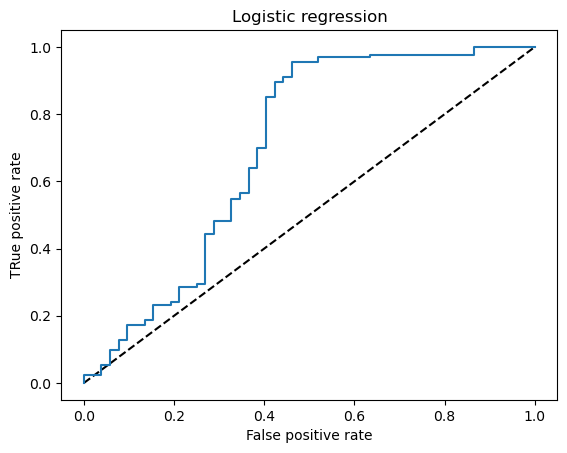

In [225]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('TRue positive rate')
plt.title('Logistic regression')
plt.show()

In [226]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))

In [227]:
print(auc_score)

0.7215876229034124


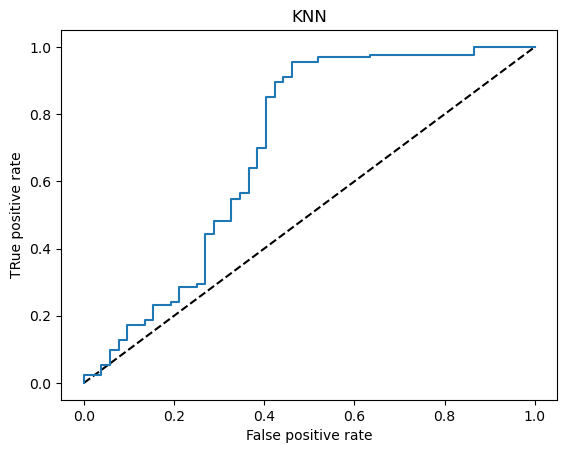

In [228]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNN')
plt.xlabel('False positive rate')
plt.ylabel('TRue positive rate')
plt.title('KNN')
plt.show()

In [229]:
auc_score=roc_auc_score(y_test,knn.predict(x_test))

In [230]:
print(auc_score)

0.5005060728744939


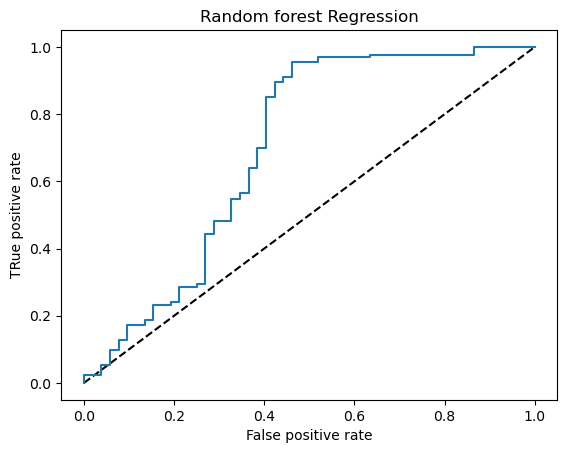

In [231]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Regression')
plt.xlabel('False positive rate')
plt.ylabel('TRue positive rate')
plt.title('Random forest Regression')
plt.show()

In [232]:
auc_score=roc_auc_score(y_test,rfc.predict(x_test))

In [233]:
print(auc_score)

0.7128397917871602


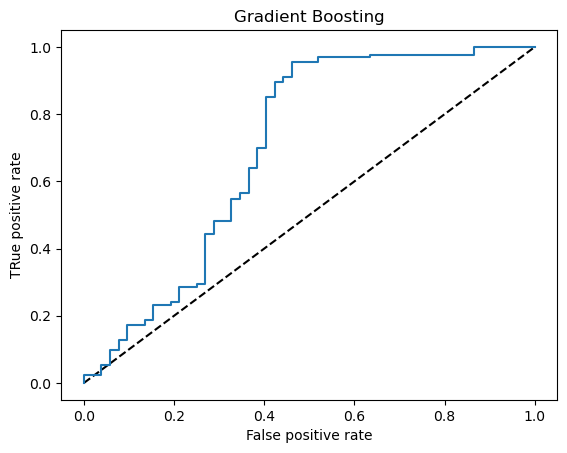

In [234]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Gradient Boosting')
plt.xlabel('False positive rate')
plt.ylabel('TRue positive rate')
plt.title('Gradient Boosting')
plt.show()

In [235]:
auc_score=roc_auc_score(y_test,gb.predict(x_test))

In [238]:
print(auc_score)

0.7199248120300752


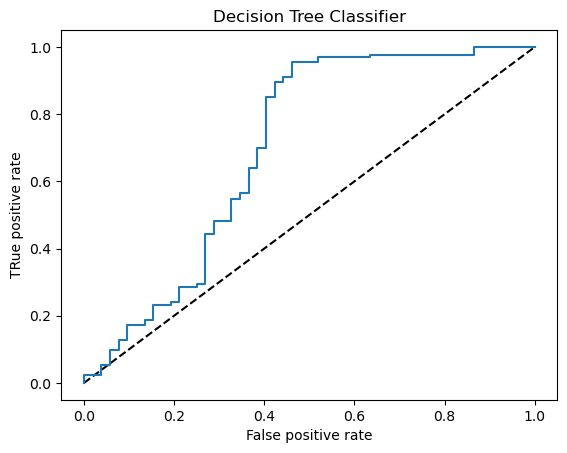

In [237]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('False positive rate')
plt.ylabel('TRue positive rate')
plt.title('Decision Tree Classifier')
plt.show()

In [239]:
auc_score=roc_auc_score(y_test,dtc.predict(x_test))

In [240]:
print(auc_score)

0.6740167727009831


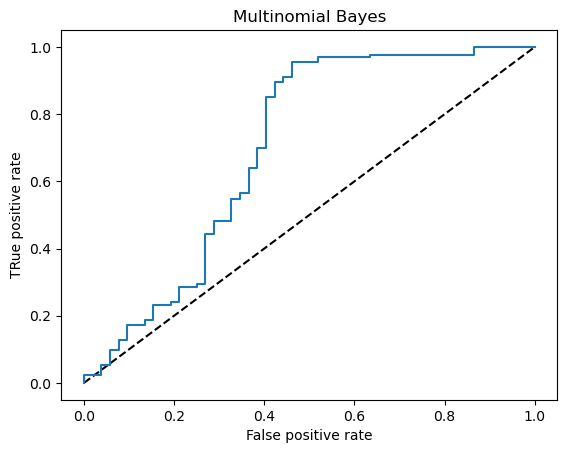

In [241]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Multinomial Bayes')
plt.xlabel('False positive rate')
plt.ylabel('TRue positive rate')
plt.title('Multinomial Bayes')
plt.show()

In [242]:
auc_score=roc_auc_score(y_test,mnb.predict(x_test))

In [243]:
print(auc_score)

0.49016772700983235


# Cross Validation Score

In [191]:
from sklearn.model_selection import KFold, cross_val_score
k_folds=KFold(n_splits=5)
score=cross_val_score(lg,x_train,y_train,cv=k_folds)

In [192]:
print('The Best score for Logistic Regression is',score.mean())

The Best score for Logistic Regression is 0.7809302325581395


In [193]:

score=cross_val_score(knn,x_train,y_train,cv=k_folds)

In [194]:
print('The Best score for KNN is',score.mean())

The Best score for KNN is 0.650451436388509


In [197]:

score=cross_val_score(svc,x_train,y_train,cv=k_folds)
print('The Best score for SVC is',score.mean())

The Best score for SVC is 0.6760054719562243


In [198]:

score=cross_val_score(gb,x_train,y_train,cv=k_folds)
print('The Best score for Gradient Boosting is',score.mean())

The Best score for Gradient Boosting is 0.7506976744186046


In [199]:

score=cross_val_score(dtc,x_train,y_train,cv=k_folds)
print('The Best score for Decision Tree Classifier is',score.mean())

The Best score for Decision Tree Classifier is 0.673734610123119


In [200]:

score=cross_val_score(rfc,x_train,y_train,cv=k_folds)
print('The Best score for Random forest Classifier is',score.mean())

The Best score for Random forest Classifier is 0.7646238030095759


In [201]:

score=cross_val_score(mnb,x_train,y_train,cv=k_folds)
print('The Best score for Multinomial Bayes is',score.mean())

The Best score for Multinomial Bayes is 0.4850068399452804


# Hyper Parameter Tuning The Best Model

In [203]:
param_grid={'penalty':['l1','l2','elasticnet','none'],'C':np.logspace(1,3,10),'solver':['lbfgs','newton-cg','liblinear','sag','saga'],'max_iter':[100,500]}

In [206]:
from sklearn.model_selection import RandomizedSearchCV
lg_random=RandomizedSearchCV(estimator=rfc,param_distributions=param_grid,n_iter=20,verbose=4,cv=5,random_state=35,n_jobs=11)

In [208]:
lg_cv=RandomizedSearchCV(LogisticRegression(),param_grid,cv=5)
lg_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([  10.        ,   16.68100537,   27.82559402,   46.41588834,
         77.42636827,  129.1549665 ,  215.443469  ,  359.38136638,
        599.48425032, 1000.        ]),
                                        'max_iter': [100, 500],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['lbfgs', 'newton-cg',
                                                   'liblinear', 'sag',
                                                   'saga']})

In [209]:
print('Best Parameters',lg_cv.best_params_)

Best Parameters {'solver': 'newton-cg', 'penalty': 'none', 'max_iter': 100, 'C': 46.41588833612777}


In [215]:
l_fit=LogisticRegression(solver= 'newton-cg', penalty= 'none', max_iter= 100,C= 46.41588833612777)

In [216]:
l_fit.fit(x_train,y_train)

LogisticRegression(C=46.41588833612777, penalty='none', solver='newton-cg')

In [217]:
df=pd.DataFrame({'Actual Data':y_test,'predicted Data':l_fit.predict(x_test)})

In [218]:
df

,Actual Data,predicted Data
441,1,1
204,1,1
132,1,1
192,0,1
275,1,1
...,...,...
398,1,1
159,1,1
555,1,1
57,0,1


In [ ]:
#Logistic regression is the best model for the prediction